# Assignment 2 - Machine Learning Basics

## Rongsheng Zhang
Netid:  rz77

## Learning Objectives:
1. Be able to apply basic regression and classification supervised learning techniques to data and evaluate the performance of those methods
2. Understand the bias-variance tradeoff and how adjusting model flexibility impacts model selection and the training process

# Conceptual Questions

## 1
**[5 points]**
For each part (a) through (d), indicate whether we would generally expect the performance of a flexible statistical learning method to be better or worse than an inflexible method. Justify your answer.

**(a)** The sample size $n$ is extremely large, and the number of predictors $p$ is small.

**(b)** The number of predictors $p$ is extremely large, and the number of observations $n$ is small.

**(c)** The relationship between the predictors and response is highly non-linear.

**(d)** The variance of the error terms, i.e. $\sigma^2 = Var(\epsilon)$, is extremely high

**ANSWER**

(a)  
Flexible method. Because a flexible model will fit the data closer and will perform better with a large sample size.  
(b)  
Inflexible method. Because a flexible method will overfit the data with small observations.  
(c)  
Flexible method. A highly non-linear relationship will need a flexible method to fit the data.  
(d)  
Inflexible method. A high variance will cause a large change in output even with a tiny change in input. Thus, a inflexible method will decrease the impact caused by high variance.

## 2
**[5 points]** For each of the following, (i) explain if each scenario is a classification or regression problem, (ii) indicate whether we are most interested in inference or prediction for that problem, and (iii) provide the sample size $n$ and number of predictors $p$ indicated for each scenario.

**(a)** We collect a set of data on the top 500 firms in the US. For each firm we record profit, number of employees, industry and the CEO salary. We are interested in understanding which factors affect CEO salary.

**(b)** We are considering launching a new product and wish to know whether it will be a success or a failure. We collect data on 20 similar products that were previously launched. For each product we have recorded whether it was a success or failure, price charged for the product, marketing budget, competition price, and ten other variables.

**(c)** We are interesting in predicting the % change in the US dollar in relation to the weekly changes in the world stock markets. Hence we collect weekly data for all of 2012. For each week we record the % change in the dollar, the % change in the US market, the % change in the British market, and the % change in the German market.

**ANSWER**

**(a)**  
(i) Regression problem. This problem deals with continuous numbers, not tags or classes.  
(ii) Inference. We are not going to predict anything, but to learn which is the most important factor.  
(iii) $n = 500$ and $p = 3$  
**(b)**  
(i) Classification problem. This problem is aimed to classify the new product, and has nothing to do with numbers.  
(ii) Prediction. We hope to predict the product is a success or failure, not to learn its inner relationship.  
(iii) $n = 20$ and $p = 13$  
**(c)**  
(i) Regression problem. This problem deals with percentage changes, not tags or classes.  
(ii) Prediction. We hope to predict the % change in US dollars in relation to the weekly changes in world stock markets, not to learn its inner relationship.   
(iii) $n = 52$ and $p = 3$  

# Practical Questions

## 3
**[20 points] Classification I: Creating a classification algorithm**.

**(a)** Build a working version of a binary kNN classifier using the skeleton code below.

**(b)** Load the datasets to be evaluated here. Each includes training features ($\mathbf{X}$), and test features ($\mathbf{y}$) for both a low dimensional ($p = 2$ features/predictors) and a high dimensional ($p = 100$ features/predictors). For each of these datasets there are $n=100$ observations of each. They can be found in the `data` subfolder in the `assignments` folder on github. Each file is labeled similar to `A1_X_train_low.csv`, which lets you know whether the file contains features, $X$, or targets, $y$; training or testing data; and is from the low or high dimensional dataset.

**(c)** Train your classifier on first the low dimensional dataset and then the high dimensional dataset with $k=5$. Evaluate the classification performance on the corresponding test data for each. Calculate the time it takes to make the predictions in each case and the overall accuracy of each set of test data predictions.

**(d)** Compare your implementation's accuracy and computation time to the scikit learn [KNeighborsClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) class. How do the results and speed compare?

**(e)** Some supervised learning algorithms are more computationally intensive during training than testing. What are the drawbacks of the prediction process being slow?

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
from sklearn.neighbors import KNeighborsClassifier as KNN

In [2]:
# (a) Write your own kNN classifier

class Knn:
# k-Nearest Neighbor class object for classification training and testing
    def __init__(self):
        self.feature = []
        self.label = []
        # size = feature.shape
        self.row = 0
        self.col = 0
        # self.mat = np.zeros(shape=(self.row,self.col))

    def fit(self, feature, label):
        # Save the training data to properties of this class
        self.feature = feature
        self.label = label.values
        size = feature.shape
        self.row = size[0]
        self.col = size[1]

    def predict(self, x, k):
        sz = x.shape[0]
        # sz = 50
        # self.row = 50
        y_hat = np.zeros(shape=(sz,1))  # Variable to store the estimated class label for
        for n in range(0,sz):   # sz
            # Calculate the distance from each vector in x to the training data
            # dist_arr = np.zeros(shape=(self.row,1))
            # for i in range(0,self.row):    # self.row
            #     dist_arr[i,:] = cal_dist(self.feature.loc[i,:],x.loc[n,:])
            x_arr = np.tile(x.loc[n,:].values,[1000,1])
            dist_arr = np.linalg.norm(self.feature.values - x_arr,axis=-1)
            shortest_k = dist_arr.argsort(axis = 0)[k:]
            label_sum = 0
            for j in range(0,k):
                label_sum = label_sum + self.label[shortest_k[j],:]
            if label_sum/k >= 0.5:
                y_hat[n] = 1

        # Return the estimated targets
        return y_hat

# Metric of overall classification accuracy
#  (a more general function, sklearn.metrics.accuracy_score, is also available)
def accuracy(y, y_hat):
    nvalues = len(y_hat)
    accuracy = np.sum(np.equal(y,y_hat)) / nvalues
    return accuracy

In [7]:
data_x_train = pd.read_csv('.\data\A1_X_train_low.csv',header = None)
data_y_train = pd.read_csv('.\data\A1_y_train_low.csv',header = None)
data_x_test = pd.read_csv('.\data\A1_X_test_low.csv',header = None)
data_y_test = pd.read_csv('.\data\A1_y_test_low.csv',header = None)
data_y_test = data_y_test.values
time1_start = time.clock()
my_knn = Knn()
my_knn.fit(data_x_train,data_y_train)
y_label_myknn = my_knn.predict(data_x_test,5)
time1_used = time.clock() - time1_start
acc1 = accuracy(y_label_myknn,data_y_test)
# print("The accuracy is {}".format(acc1))
time2_start = time.clock()
knncl = KNN(n_neighbors = 5)
knncl.fit(data_x_train,np.ravel(data_y_train))
y_label_knncl = knncl.predict(data_x_test).reshape(1000,1)
# print(y_label_knncl.shape,data_y_test.shape)
time2_used = time.clock() - time2_start
acc2 = accuracy(y_label_knncl,data_y_test)
print("(c)")
print("This is for lower case")
print("The accuracy of my_knn is {}".format(acc1))
print("The accuracy of sklearn knn is {}".format(acc2))
print("The time of my_knn is {}".format(time1_used))
print("The time of sklearn knn is {}".format(time2_used))

(c)
This is for lower case
The accuracy of my_knn is 0.906
The accuracy of sklearn knn is 0.925
The time of my_knn is 0.33242681562057896
The time of sklearn knn is 0.00505732883800647


In [8]:
# Evaluate the performance of your kNN classifier on a low- and a high-dimensional dataset 
#   and time the predictions of each
data_x_train = pd.read_csv('.\data\A1_X_train_high.csv',header = None)
data_y_train = pd.read_csv('.\data\A1_y_train_high.csv',header = None)
data_x_test = pd.read_csv('.\data\A1_X_test_high.csv',header = None)
data_y_test = pd.read_csv('.\data\A1_y_test_high.csv',header = None)
data_y_test = data_y_test.values
time1_start = time.clock()
my_knn = Knn()
my_knn.fit(data_x_train,data_y_train)
y_label_myknn = my_knn.predict(data_x_test,5)
time1_used = time.clock() - time1_start
acc1 = accuracy(y_label_myknn,data_y_test)
# print("The accuracy is {}".format(acc1))
time2_start = time.clock()
knncl = KNN(n_neighbors = 5)
knncl.fit(data_x_train,np.ravel(data_y_train))
y_label_knncl = knncl.predict(data_x_test).reshape(1000,1)
# print(y_label_knncl.shape,data_y_test.shape)
time2_used = time.clock() - time2_start
acc2 = accuracy(y_label_knncl,data_y_test)
print("(c)")
print("This is for higher case")
print("The accuracy of my_knn is {}".format(acc1))
print("The accuracy of sklearn knn is {}".format(acc2))
print("The time of my_knn is {}".format(time1_used))
print("The time of sklearn knn is {}".format(time2_used))

(c)
This is for higher case
The accuracy of my_knn is 0.981
The accuracy of sklearn knn is 0.993
The time of my_knn is 0.6526691976273469
The time of sklearn knn is 0.2322740157563885


**(d)**  
As we can see, the overall accuracy of my_knn is a little lower than sklearn knn for both lower and higher dimension datasets. 
  
For computing time, we can find that my_knn model is slower than the sklearn knn.  
  
P.S. I find that if we choose the square of the difference of two vectors as the metric of distance, then the accuracy will increase but the computing time will increase a lot. Here I choose to use the norm so that the program can run faster.

**(e)**  
If the prediction is slow, then the computing time will be extremly long when the test samples are large. Also, some predictions need to be fast enough to utilize in real life. For example, if a company needs to use the data in past few days to predict the result tomorrow, then a slow prediction may cause a delay in the scheme made for tomorrow.

## 4
**[10 points] Classification II**. The table below provides a training dataset containing six observations ($n=6$), three predictors ($p=3$), and one qualitative response variable.

*Table 1. Dataset with $n=6$ observations in $p=3$ dimensions with a categorical response, $y$*

| Obs. | $x_1$ | $x_2$ | $x_3$ | $y$   |
|------|-------|-------|-------|-------|
| **1**| 0     | 3     | 0     | Red   |
| **2**| 2     | 0     | 0     | Red   |
| **3**| 0     | 1     | 3     | Red   |
| **4**| 0     | 1     | 2     | Blue  |
| **5**| -1    | 0     | 1     | Blue  |
| **6**| 1     | 1     | 1     | Red   |

We want to use this dataset to make a prediction for $y$ when $x_1=x_2=x_3=0$ using $K$-nearest neighbors. You are given some code below to get you started.

**(a)** Compute the Euclidean distance between each observation and the test point, $x_1=x_2=x_3=0$. Present your answer in a table similar in style to Table 1 with observations 1-6 as the row headers.

**(b)** What is our prediction with $K=1$? Why?

**(c)** What is our prediction with $K=3$? Why?

**(d)** If the Bayes decision boundary (the optimal decision boundary) in this problem is highly nonlinear, then would we expect the *best* value of $K$ to be large or small? Why?

In [2]:
import numpy as np

X = np.array([[ 0, 3, 0],
              [ 2, 0, 0],
              [ 0, 1, 3],
              [ 0, 1, 2],
              [-1, 0, 1],
              [ 1, 1, 1]])
y = np.array(['r','r','r','b','b','r'])

**ANSWER**:

In [13]:
X_test = np.array([0,0,0])
dist = np.zeros(shape =(6,1))
for i in range(0,6):
    dist[i] = np.linalg.norm(X_test - X[i,:])
np.set_printoptions(formatter={'float': '{: 0.3f}'.format})
print(dist)

[[ 3.000]
 [ 2.000]
 [ 3.162]
 [ 2.236]
 [ 1.414]
 [ 1.732]]


**(a)**  

| Obs. | Dist. |
|------|-------|
| **1**| 3.000     |
| **2**| 2.000     |
| **3**| 3.162     |
| **4**| 2.236     | 
| **5**| 1.414     |
| **6**| 1.732     | 

**(b)**  
If $K = 1$, the prediction will be Blue. Because the closest point is Point 5, which is labelled Blue.

**(c)**  
If $K = 3$, the prediction will be Red. Because the closest 3 points are Point 2, 5 and 6, which are labelled Red, Blue and Red, respectively.

**(d)**  
If the Bayes decision boundary in this problem is highly nonlinear, the we would expect the best value of K to be small rather than large. Because smaller value of K will result in higher flexibility, which is better in the case that the boundary is highly nonlinear.

## 5
**[20 points] Bias-variance tradeoff I: Understanding the tradeoff**. This exercise will illustrate the impact of the bias-variance tradeoff on classifier performance by looking at classifier decision boundaries.

**(a)** Create a synthetic dataset (with both features and targets). Use the [`make_moons`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html#sklearn.datasets.make_moons) module with the parameter `noise=1` to generate 1000 random samples.

**(b)** Scatterplot your random samples with each class in a different color

**(c)** Create 3 different data subsets by selecting 100 of the 1000 data points at random three times. For each of these 100-sample datasets, fit three k-Nearest Neighbor classifier with: $k = \{1, 25, 50\}$. This will result in 9 combinations (3 datasets, with 3 trained classifiers).

**(d)** For each combination of dataset trained classifier, in a 3-by-3 grid, plot the decision boundary (similar in style to Figure 2.15 from *Introduction to Statistical Learning*). Each column should represent a different value of $k$ and each row should represent a different dataset.

**(e)** What do you notice about the difference between the rows and the columns. Which decision boundaries appear to best separate the two classes of data? Which decision boundaries vary the most as the data change?

**(f)** Explain the bias-variance tradeoff using the example of the plots you made in this exercise.

**ANSWER**

**(a)**

In [9]:
import numpy as np
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier as KNN
from mpl_toolkits.axes_grid1 import Grid

feature,label = make_moons(n_samples = 1000, noise = 0.35)

**(b)**

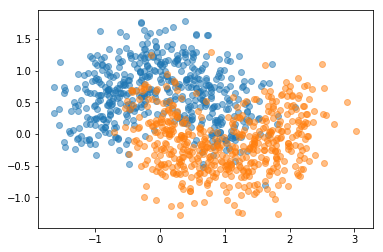

In [10]:
f_0 = feature[label == 0]
f_1 = feature[label == 1]
plt.scatter(f_0[:,0],f_0[:,1], alpha = 0.5)
plt.scatter(f_1[:,0],f_1[:,1], alpha = 0.5)
plt.show()

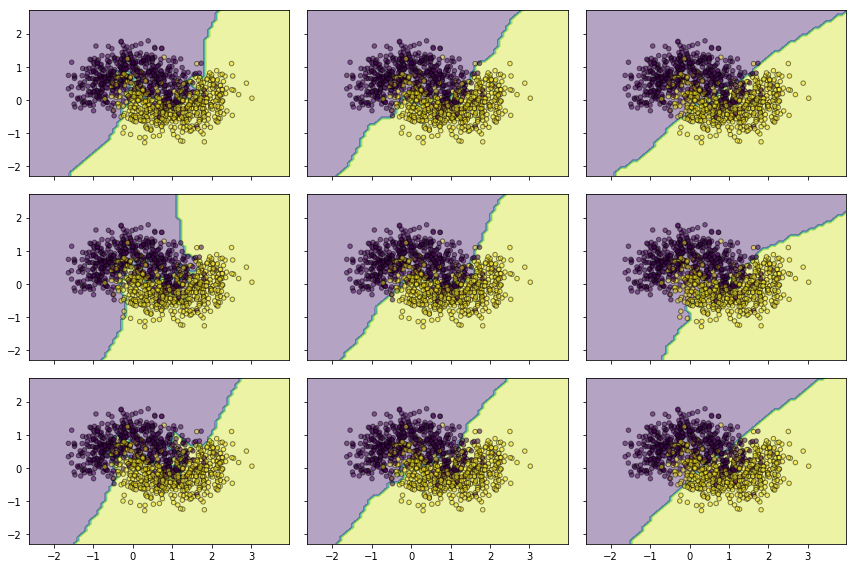

In [16]:
data_set = np.zeros(shape  = (1000,3))
data_set[:,0:2] = feature.copy()
data_set[:,2] = label.copy()
idx1 = np.random.choice(range(0,1000),100)
idx2 = np.random.choice(range(0,1000),100)
idx3 = np.random.choice(range(0,1000),100)
set1 = data_set[idx1,:]
set2 = data_set[idx2,:]
set3 = data_set[idx3,:]
# set 1
cf11 = KNN(n_neighbors=1)
cf11.fit(set1[:,0:2],set1[:,2])
cf12 = KNN(n_neighbors=25)
cf12.fit(set1[:,0:2],set1[:,2])
cf13 = KNN(n_neighbors=50)
cf13.fit(set1[:,0:2],set1[:,2])
# set 2
cf21 = KNN(n_neighbors=1)
cf21.fit(set2[:,0:2],set2[:,2])
cf22 = KNN(n_neighbors=25)
cf22.fit(set2[:,0:2],set2[:,2])
cf23 = KNN(n_neighbors=50)
cf23.fit(set2[:,0:2],set2[:,2])
# set 3
cf31 = KNN(n_neighbors=1)
cf31.fit(set3[:,0:2],set3[:,2])
cf32 = KNN(n_neighbors=25)
cf32.fit(set3[:,0:2],set3[:,2])
cf33 = KNN(n_neighbors=50)
cf33.fit(set3[:,0:2],set3[:,2])

cf_arr = [cf11,cf12,cf13,cf21,cf22,cf23,cf31,cf32,cf33]

x_min, x_max = feature[:, 0].min() - 1, feature[:, 0].max() + 1
y_min, y_max = feature[:, 1].min() - 1, feature[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))


fig = plt.figure(figsize=(12, 8))
grid = Grid(fig, rect=111, nrows_ncols=(3,3), axes_pad=0.25, label_mode='L')
for i, ax in enumerate(grid):
    Z = cf_arr[i].predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.4)
    ax.scatter(feature[:, 0], feature[:, 1], s=20,c=label, edgecolor='k',alpha = 0.5)
plt.tight_layout()
plt.show()

**(e)**  
We can notice that in all three rows, the boundary in first column is the most flexible one and the boundary in the last column seems quite flat. And the boundaries in the first column change rapidly as the dataset changes but the boundaries in the third column change a little when dataset changes.  
  
The model with $k = 25$ seems to have the best performance --- it is flexible enough but will not change too much due to a tiny change in samples.
  
The model with $k = 1$ changes the most when the dataset changes.

**(f)**  
In this exercise, the model with $k = 1$ has the least bias because it is the most flexible one and it will try to fit every single sample. However, this model will have a high variance because the boundary is so twisted that even a tiny change of a sample may cause a huge change.  
  
On the other hand, the model with $k = 50$ has the least variance because the boundary is very flat and the boundary will not change a lot due to a change in sample. However, its bias may be large because the boundary is not flexible enough to separate those samples correctly.  
  
That is the concept of bias-variance trade-off. A low bias may cause a high variance and a low variance may cause a high bias --- one cannot decrease those two to a very low degree at the same time.

## 6
**[20 points] Bias-variance trade-off II: Quantifying the tradeoff**. This exercise will explore the impact of the bias-variance tradeoff on classifier performance by looking at classifier decision boundaries.

Here, the value of $k$ determines how flexible our model is.

**(a)** Using the function created earlier to generate random samples (using the `make_moons` function), create a new set of 1000 random samples, and call this dataset your test set and the previously created dataset your training set.

**(b)** Train a kNN classifier on your training set for $k = 1,2,...500$. Apply each of these trained classifiers to both your training dataset and your test dataset and plot the classification error (fraction of mislabeled datapoints).

**(c)** What trend do you see in the results?

**(d)** What values of $k$ represent high bias and which represent high variance?

**(e)** What is the optimal value of $k$ and why?

**(f)** In kNN classifiers, the value of k controls the flexibility of the model - what controls the flexibility of other models?

**ANSWER**

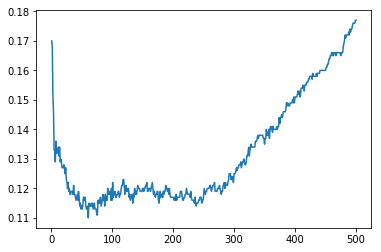

The best value of k is 60


In [22]:
feature_test,label_test = make_moons(n_samples = 1000, noise = 0.35)
test_set = np.zeros(shape  = (1000,3))
test_set[:,0:2] = feature_test.copy()
test_set[:,2] = label_test.copy()
err_arr = np.zeros(shape = (500,1))
for i in range(0,500):
    cf = KNN(n_neighbors=i+1)
    cf.fit(data_set[:,0:2],data_set[:,2])
    y_hat = cf.predict(test_set[:,0:2])
    err_arr[i] = (1000 - sum(np.equal(test_set[:,2],y_hat))) / 1000
plt.plot(range(1,501),err_arr)
plt.show()
idx = err_arr.argmin()
print("The best value of k is {}".format(idx))

**(c)**  
As we can see, the error rate is very high when k is small. It first decreases as k increases. But it begins to increase as k goes past a number, and the error rate will become very large when k becomes large.

**(d)**  
When k is small, it represents high variance because the model is too flexible.  
When k is large, it represents high bias because the model is not flexible enough to fit the data.

**(e)**   
The best value of k is 60 because the error rate is the lowest when $k = 60$.

**(f)**  
For example, in neural network, the number of nodes in each layer will control the flexibility of the model.

## 7
**[20 points] Linear regression and nonlinear transformations**. You're given a dataset below that is partitioned into a training and testing dataset. Your goal is to develop a regression algorithm from the training data that performs well on the test data.

*Hint: Use the scikit learn [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) module.*

**(a)** Create a scatter plot of your training data.

**(b)** Estimate a linear regression model ($y = a_0 + a_1 x$) for the training data and calculate both the $R^2$ value and mean square error for the fit of that model for the training data. Also provide the equation representing the estimated model (e.g. $y = a_0 + a_1 x$, but with the estimated coefficients inserted.

**(c)** A linear model does not mean that non-linear relationships cannot be explored. From looking at the scatter plot of the training data, choose a transformation of the predictor variable, $x$ that may make sense for these data. This will be a multiple regression model of the form $y = a_0 + a_1 x_1 + a_2 x_2 + \ldots + a_n x_n$. Here $x_i$ could be any transformations of x - perhaps it's $\frac{1}{x}$, $log(x)$, $sin(x)$, $x^k$ (where $k$ is any power of your choosing). Provide the estimated equation for this multiple regression model (e.g. if you chose your predictors to be $x_1 = x$ and $x_2 = log(x)$, your model would be of the form $y = a_0 + a_1 x + a_2 log(x)$. Also provide the $R^2$ and mean square error of the fit for the training data.

**(d)** Using both of the models you created here in (b) and (c), plot the original data (as a scatter plot) and the two curves representing your models (each as a separate line).

**(e)** Using the models above, apply them to the test data and estimate the $R^2$ and mean square error of the test dataset.

**(f)** Which models perform better on the training data, and which on the test data? Why?

**(g)** Imagine that the test data were significantly different from the training dataset. How might this affect the predictive capability of your model? Why?

In [23]:
x_train = [3.19,9.26,9.38,8.77,7.91,3.79,3.18,7.61,2.36,6.26,6.62,1.53,6.25,7.93,7.07,4.58,4.14,2.14,9.04,4.56,3.99,6.71,2.51,0.84,6.13,5.22,0.25,3.60,1.36,5.59,4.81,1.14,0.36,2.31,1.37,5.86,4.23,9.48,2.26,0.77,4.33]
y_train = [46.40,172.16,209.00,203.31,82.88,62.57,14.38,177.00,8.01,82.35,84.84,-5.59,54.96,167.17,83.09,-21.63,94.64,63.97,106.57,38.99,88.26,66.99,-11.12,-0.44,65.08,61.47,-0.61,23.85,10.55,83.69,54.35,51.82,-18.63,1.98,4.90,55.44,50.09,155.66,45.57,18.12,30.58]

x_test = [5.65,0.07,8.84,5.14,6.65,1.35,5.45,7.39,3.35]
y_test = [98.52,16.09,198.45,75.90,85.11,47.64,14.76,141.03,-39.13]

**ANSWER**

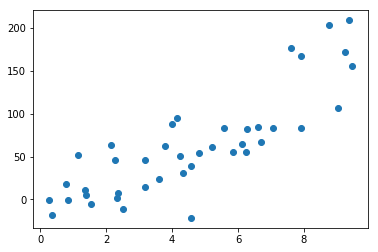

In [24]:
plt.scatter(x_train,y_train)
plt.show()

In [33]:
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

x_train = np.array(x_train).reshape(-1,1)
y_train = np.array(y_train).reshape(-1,1)
mat = np.hstack((x_train,y_train))
mat = mat[mat[:,0].argsort()]
x_train = mat[:,0]
y_train = mat[:,1]
x_train = np.array(x_train).reshape(-1,1)
y_train = np.array(y_train).reshape(-1,1)

x_test = np.array(x_test).reshape(-1,1)
y_test = np.array(y_test).reshape(-1,1)
mat = np.hstack((x_test,y_test))
mat = mat[mat[:,0].argsort()]
x_test = mat[:,0]
y_test = mat[:,1]
x_test = np.array(x_test).reshape(-1,1)
y_test = np.array(y_test).reshape(-1,1)

The R is 0.7014590913812251 and the mean_square_error is 1052.5853662498016
The equation is y = 18.303206847693172*x + -21.73078292905428


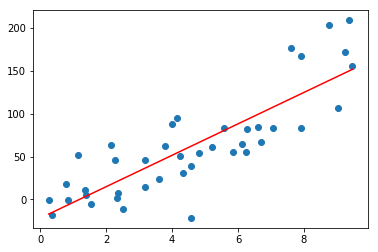

In [40]:
lr = linear_model.LinearRegression()
lr.fit(x_train,y_train)
y_train_hat = lr.predict(x_train)
R = lr.score(x_train, y_train)
md_coef = lr.coef_[0,0]
md_itcp = lr.intercept_[0]
mse_train = mean_squared_error(y_train,y_train_hat)
print("The R is {} and the mean_square_error is {}".format(R,mse_train))
print('The equation is y = {}*x + {}'.format(md_coef,md_itcp))

plt.scatter(x_train,y_train)
plt.plot(x_train,y_train_hat,color = 'red')
plt.show()

** Here I choose the cubic function of the original training data as a new training data.**

The R is 0.7535024210407522 and the mean_square_error is 869.09276731595
The equation is y = -3.8892808072177374 + 14.352789235849015*x + -1.6946077493674494*x^2 + 0.23974420984151465*x^3


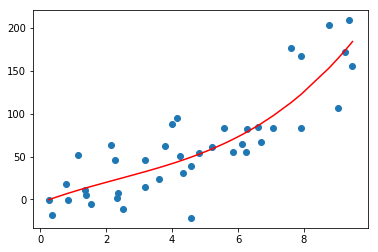

In [42]:
x_train_multi = np.hstack((x_train,x_train**2, x_train**3))
# print(x_train_multi.shape)
lr_multi = linear_model.LinearRegression()
lr_multi.fit(x_train_multi,y_train)
y_train_multi_hat = lr_multi.predict(x_train_multi)
R_multi = lr_multi.score(x_train_multi, y_train)
mse_multi_train = mean_squared_error(y_train,y_train_multi_hat)
md_multi_coef = lr_multi.coef_
md_multi_itcp = lr_multi.intercept_
print("The R is {} and the mean_square_error is {}".format(R_multi,mse_multi_train))
print('The equation is y = {} + {}*x + {}*x^2 + {}*x^3'.format(md_multi_itcp[0], md_multi_coef[0,0],md_multi_coef[0,1],md_multi_coef[0,2]))
plt.scatter(x_train,y_train)
plt.plot(x_train,y_train_multi_hat,color = 'red')
plt.show()

**Testing data in linear model : **

The R is 0.5556465885794164 and the mean_square_error is 2023.3121088887124


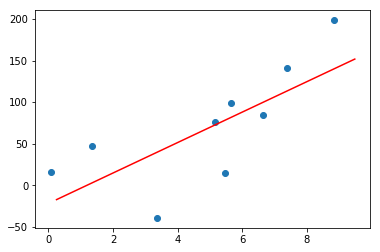

In [43]:
y_test_hat = lr.predict(x_test)
R = lr.score(x_test, y_test)
md_coef = lr.coef_[0,0]
md_itcp = lr.intercept_[0]
mse_test = mean_squared_error(y_test,y_test_hat)
print("The R is {} and the mean_square_error is {}".format(R,mse_test))
# print('The equation is y = {}*x + {}'.format(md_coef,md_itcp))

plt.scatter(x_test,y_test)
plt.plot(x_train,y_train_hat,color = 'red')
plt.show()

**Testing data in 'cubic' transformation linear model :**

The R is 0.6680501656153094 and the mean_square_error is 1511.4953597564195


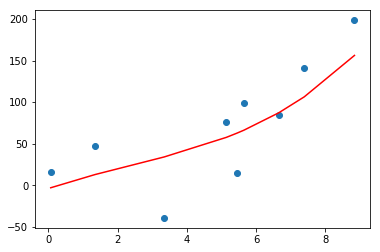

In [44]:
x_test_multi = np.hstack((x_test,x_test**2, x_test**3))
# print(x_train_multi.shape)
# lr_multi = linear_model.LinearRegression()
# lr_multi.fit(x_train_multi,y_train)
y_test_multi_hat = lr_multi.predict(x_test_multi)
R_multi = lr_multi.score(x_test_multi, y_test)
mse_multi_test = mean_squared_error(y_test,y_test_multi_hat)
md_multi_coef = lr_multi.coef_
md_multi_itcp = lr_multi.intercept_
print("The R is {} and the mean_square_error is {}".format(R_multi,mse_multi_test))
# print('The equation is y = {}*x + {}'.format(md_multi_coef,md_multi_itcp))
plt.scatter(x_test,y_test)
plt.plot(x_test,y_test_multi_hat,color = 'red')
plt.show()

**(f)**  
As we can see, the model with cubic transformation has better performance in both training data and testing data.  
That is because the cubic transformation provides higher flexibility, which is better to fit those outliers.  
Recall from the last question, the error rate will decrease with the increasing of the flexibility at the begining.

**(e)**  
If the testing data is significantly different from training data, then the prediction may become quite incorrect. That is because the model is 'learned' from the training data and it catches those features from the training data. If the testing data is totally different, then using the function generated from the training data to predict the testing data will be unreasonable.